## Exercises

1. __Sigmoid neurons simulating perceptrons, part I__: Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, $c > 0$. Show that the behaviour of the network doesn't change. 

    `Ans:`
     
    \begin{align*}
        (c \times w) \cdot x + c \times b   &= c \times (w \cdot x) + c \times b \\
                                            &= c \times (w \cdot x + b)
                                            \\
        \text{For a perceptron,} \\
                                    output =& \begin{cases}
                                            0    & w \cdot x + b \leq 0 \\
                                            1    & w \cdot x + b > 0
                                            \end{cases} \\
                                            \\
        \text{When, } w \cdot x + b         &\leq 0 \\
        \text{For some positive constant } c, \\
            c \times (w \cdot x + b)        &\leq 0 \\
                                            \\
        \text{Similarly,} \\
        \text{When, } w \cdot x + b         &> 0 \\
         c \times (w \cdot x + b)           &> 0 \\
    \end{align*}

2. __Sigmoid neurons simulating perceptrons, part II__: Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value, we just need the input to have been fixed. Suppose the weights and biases are such that $w \cdot x + b \neq 0$ for the input $x$ to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant $c > 0$. Show that in the limit as $c \rightarrow \infty$ the behaviour of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when $w \cdot x + b = 0$ for one of the perceptrons? 

    `Ans:`

    \begin{align*}
        \text{For } w \cdot x + b > 0, \\
        \lim_{c \rightarrow \infty} c \times (w \cdot x + b)    &= +\infty
                                                                \\ \\
        \text{For } w \cdot x + b < 0, \\
        \lim_{c \rightarrow \infty} c \times (w \cdot x + b)    &= -\infty 
                                                                \\ \\
        \text{The output of the sigmoid neuron is given by,} \\
                                                    \sigma      &= \frac{1}{1 + e^{-z}} \quad [z = w \cdot x + b]
                                                                \\ \\
        \text{When, }                       w \cdot x + b       &= +\infty \\
                                                    \sigma      &= \frac{1}{1 + e^{-\infty}} \quad \\
                                                                &= \frac{1}{1 + 0} \quad \\
                                                                &= 1
                                                                \\ \\
        \text{When, }                       w \cdot x + b       &= -\infty \\
                                                    \sigma      &= \frac{1}{1 + e^{\infty}} \quad \\
                                                                &= \frac{1}{\infty} \quad \\
                                                                &= 0
                                                                \\ \\
        \text{When, }                       w \cdot x + b       &= 0 \\
                                                    \sigma      &= \frac{1}{1 + e^{0}} \quad \\
                                                                &= \frac{1}{1 + 1} \quad \\
                                                                &= 0.5 \quad \text{[which is not a valid value for a perceptron]}
    \end{align*}

3. There is a way of determining the bitwise representation of a digit by adding an extra layer to the three-layer network above. The extra layer converts the output from the previous layer into a binary representation, as illustrated in the figure below. Find a set of weights and biases for the new output layer. Assume that the first 3 layers of neurons are such that the correct output in the third layer (i.e., the old output layer) has activation at least 0.99, and incorrect outputs have activation less than 0.01. 

<div style='background-color: #ffffff; display: flex; justify-content: center; padding-bottom: 8px'>
    <img src='other-assets/tikz13.png' />
</div>

`Ans:` Assuming $0.99$ is activation for the correct neuron and $0.009$ is activation for the incorrect neurons.

\begin{align*}
    \text{Weights, }    w^{(O)} &= \begin{bmatrix}
        -0.5 & -0.5 & -0.5 & -0.5 & -0.5 & -0.5 & -0.5 & -0.5 & 0.1 & 0.09 \\
        -0.5 & -0.5 & -0.5 & -0.5 & 0.1 & 0.07 & 0.05 & 0.1 & -0.5 & -0.5 \\
        -0.5 & -0.5 & 0.09 & 0.1 & -0.5 & -0.5 & 0.1 & 0.04 & -0.5 & -0.5 \\
        -0.5 & -0.5 & -0.5 & 0.04 & -0.5 & 0.04 & -0.5 & 0.07 & -0.5 & 0.1         
    \end{bmatrix} 
    \\
    \text{Biases, }     b^{(O)} &= \begin{bmatrix}
        0 & 0 & 0 & 0
    \end{bmatrix}^T
    \\
    \text{Input activations, } a^{(I)} &= \begin{bmatrix}
        a_0^{(I)} & a_1^{(I)} & a_2^{(I)} & a_3^{(I)} & a_4^{(I)} & a_5^{(I)} & a_6^{(I)} & a_7^{(I)} & a_8^{(I)} & a_9^{(I)}
    \end{bmatrix}^T
    \\
        z &= w^{(O)} a^{(I)} + b^{(O)}
    \\
    \text{Output, } O_i &= \begin{cases}
    0   &   \sigma(z_i) < 0.5 \\
    1   &   \sigma(z_i) \geq 0.5 \\
    \end{cases}
\end{align*}

4. An extreme version of gradient descent is to use a mini-batch size of just 1. That is, given a training input, x, we update our weights and biases according to the rules $wk \rightarrow w'_{k}=w_k − \eta \frac{\partial C_x}{\partial w_k}$ and $b_l \rightarrow b'_{l}=b_l − \eta \frac{\partial C_x}{\partial b_l}$. Then we choose another training input, and update the weights and biases again. And so on, repeatedly. This procedure is known as online, on-line, or incremental learning. In online learning, a neural network learns from just one training input at a time (just as human beings do). Name one advantage and one disadvantage of online learning, compared to stochastic gradient descent with a mini-batch size of, say, 20. 

    `Ans:`
    
    Advantage: Faster weight updates as new data come.
    
    Disadvantage: Update based on a mini-batch could be noisy resulting into a performance degradation. 

### Notations:

- Weight from $k^{th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer: $w_{jk}^l$
- Bias for the $j^{th}$ neuron in the $l^{th}$: $b_j^l$
- Activation at the $j^{th}$ neuron in $l^{th}$ layer: $a_j^l = \sigma{(\sum_{k} w_{jk}^l a_k^{l-1} + b_j^l)}$

### Matrix Form:
- Weights in the $l^{th}$ layer: $w^l = \begin{bmatrix} 
    w_{00}^l & w_{01}^l & w_{02}^l & \cdots & w_{0k}^l \\
    w_{10}^l & w_{11}^l & w_{12}^l & \cdots & w_{1k}^l \\
    w_{20}^l & w_{21}^l & w_{22}^l & \cdots & w_{2k}^l \\
    \vdots  &   \vdots  &   \vdots  & \ddots  &   \vdots \\
    w_{j0}^l & w_{j1}^l & w_{j2}^l & \cdots & w_{jk}^l \\
\end{bmatrix}_{j \times k}$
- Biases in the $l^{th}$ layer: $b^l = \begin{bmatrix} b_0^l \\ b_1^l \\ b_2^l \\ \vdots \\ b_j^l \end{bmatrix}$
- Activations in the $l^{th}$ layer: $a^l = \sigma(w^l a^{l-1} + b^l)$

### Back Propagation

In neural network, we can directly calculate the gradient of the cost function for just the last layer. To update the weights and biases at the previous layers we use this algorithm called `Back Propagation` which propagates the error backward from last layer. Before calculating the gradient w.r.t the weights ($w$) and biases ($b$), we need to calculate an intermediate quantity $\delta$. 

$\delta$ is the measure of error of the cost function w.r.t the weighted input $z$ ($w^{l} a^{l-1} + b^l$). The form of this error depends on the cost function. For the quadratic cost function (**_MSE_**), $\delta$ at the last layer $L$ is:

\begin{align*}
    \delta_j^L &= \frac{\partial C}{\partial a_j^L} \sigma'(z_j^L) \quad [a_j = \sigma(z_j)] \tag{1}
    \\ \\
    \text{Here,} \\
    \frac{\partial C}{\partial a_j^L} &= \frac{1}{2} \frac{\partial}{\partial a_j^L} (y_j - a_j^L)^2 \\
                                      &= (a_j^L - y_j)
    \\ \\
    \text{So, $\delta_j^L$ can be re-written as, } \\
    \delta_j^L &= (a_j^L - y_j) \sigma'(z_j^L) 
    \\ \\
\end{align*}

Since, $\frac{\partial C}{\partial a^L}$ is the gradient of the cost function w.r.t the activations at the last layer, we can write:

\begin{align*}
    \delta^L &= \nabla_aC \odot \sigma'(z^L) \tag{1a} \\
             &= (a^L - y) \odot \sigma'(z^L)
\end{align*}

$\delta^l$ in terms of the errors at the next layer ($l+1$):

\begin{align*}
    \delta_j^l &= \left(\sum_k w_{kj}^{l+1} \delta_k^{l+1}\right) \sigma'(z_j^l) 
    \\ \\
    \delta^l   &= ({(w^{l+1})}^T \delta^{l+1}) \odot \sigma'(z^l) \tag{2} \\ 
\end{align*}

Gradient of the cost function w.r.t biases ($b$) at any layer:

\begin{align*}
    \frac{\partial C}{\partial b_j^l} &= \delta_j^l \tag{3}
\end{align*}

Gradient of the cost function w.r.t weights ($w$) at any layer:

\begin{align*}
    \frac{\partial C}{\partial w_{jk}^l} &= a_k^{l-1} \delta_j^l  \tag{4}
\end{align*}

### Derivations of the Equations:

\begin{align*}
    \text{Cost function, } C(a^L) &= C\left(\sum_{j} a_j^L\right) \\
    \text{where, } a_j^L &= \sigma\left(\sum_{k} w_{jk}^{L} a_k^{L-1} + b_j^L\right) \\
                         &= \sigma(z_j^L)
    \\ \\
    \frac{\partial C}{\partial w_{jk}^L} &= \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} \frac{\partial z_j^L}{\partial w_{jk}^L} \\
                                         &= \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} a_{k}^{L-1} \\
                                         &= a_{k}^{L-1} \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} \\
                                         &= a_{k}^{L-1} \delta_j^L
    \\ \\
    \frac{\partial C}{\partial b_{j}^L} &= \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} \frac{\partial z_j^L}{\partial b_{j}^L} \\
                                         &= \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} (1) \\
                                         &= \delta_j^L
    \\ \\
\end{align*}

We can see that, error $\delta_j^l$ is the partial derivative of the cost function $C$ with respect to $z_j^l$.
\begin{align*}
    \delta_j^l &= \frac{\partial C}{\partial z_j^l}
\end{align*}

Change on $z_j^l$ influences change on all the pre-activations in the next layer ($z_k^{l+1}$).
\begin{align*}   
    \delta_j^l &= \frac{\partial C}{\partial z_j^l} \\
               &= \sum_{k} \frac{\partial C}{\partial z_k^{l+1}} \frac{\partial z_k^{l+1}}{\partial z_j^l} \\
               &= \sum_{k} \delta_k^{l+1} \frac{\partial z_k^{l+1}}{\partial z_j^l} \\
               &= \sum_{k} \frac{\partial z_k^{l+1}}{\partial z_j^l} \delta_k^{l+1} \\
    \\ 
    \text{where, } z_k^{l+1} &= \sum_{j} w_{kj}^{l+1} a_j^{l} + b_k^{l+1}
    \\
    \frac{\partial z_k^{l+1}}{\partial z_j^l} &= w_{kj}^{l+1} \frac{\partial a_j^l}{\partial z_j^l}
    \\ \\
    \text{Substituting back to the equation of $\delta_j^l$,} \\
    \delta_j^l &= \sum_{k} w_{kj}^{l+1} \frac{\partial a_j^l}{\partial z_j^l} \delta_k^{l+1} \\
               &= \sum_{k} w_{kj}^{l+1} \delta_k^{l+1} \frac{\partial a_j^l}{\partial z_j^l}
\end{align*}   

### Improving Learning by Changing the Cost Function: (Binary Cross-Entropy)

While using the quadratic cost function (`MSE`), the learning slows down when the error is either really high or close to the expectation. For example: if the expected $y$ is 0 and the output neuron is $0.9$, the sigmoid function $\sigma(z)$ is almost flat. Causing the derivative $\sigma'(z)$ being close to $0$. As a result, the parameter update slows down.

To solve this, a new cost function called `Cross-Entropy` can be used which doesn't include the derivative of the activation function during gradient calculation of cost function. The equation of the `Cross-Entropy` cost function is given by:
\begin{align*}
    C &= -\frac{1}{n} \sum_{x} [y \ln{a} + (1 - y) \ln{(1 - a)}]
    \\ \\
    \text{For a single output neuron,} \\
    \frac{\partial C}{\partial w_j} &= -\frac{1}{n} \sum_{x} [y \frac{1}{\sigma(z)} + (1 - y) \frac{1}{(1 - \sigma(z))}] \frac{\partial \sigma} {\partial w_j} \\
                                   &= -\frac{1}{n} \sum_{x} [\frac{y}{\sigma(z)} - \frac{(1 - y)}{1 - \sigma(z)}] \sigma'(z) (x_j) \\
                                   &= -\frac{1}{n} \sum_{x} \frac{y (1 - \sigma(z)) - (1 - y) \sigma(z)}{\sigma(z) (1 - \sigma(z))} \sigma'(z) (x_j) \\
                                   &= -\frac{1}{n} \sum_{x} \frac{y - y\sigma(z) - \sigma(z) + y\sigma(z)}{\sigma(z) (1 - \sigma(z))} \sigma'(z) (x_j) \\
                                   &= -\frac{1}{n} \sum_{x} \frac{y - \sigma(z)}{\sigma(z) (1 - \sigma(z))} \sigma'(z) (x_j) \\
                                   &= -\frac{1}{n} \sum_{x} \frac{\sigma'(z)}{\sigma(z) (1 - \sigma(z))} (y - \sigma(z)) (x_j) \\
                                   &= -\frac{1}{n} \sum_{x} \frac{\sigma(z) (1 - \sigma(z))}{\sigma(z) (1 - \sigma(z))} (y - \sigma(z)) (x) \\
                                   &= -\frac{1}{n} \sum_{x} (y - \sigma(z)) (x_j) \\
                                   &= \frac{1}{n} \sum_{x} x_j (\sigma(z) - y) \\
                                  \\ 
    \text{Similarly, } \frac{\partial C}{\partial b} &= \frac{1}{n} \sum_{x} (\sigma(z) - y)
\end{align*}

For multiple neurons in the output layer, the `Cross-Entropy` function is given by:
\begin{align*}
    C &= -\frac{1}{n} \sum_{x} \sum_{j} [y_j \ln{a_j^L} + (1 - y_j) \ln{(1 - a_j^L)}]
\end{align*}

Criterions it fulfils of being a cost function:
- **$C > 0$**: Since, $a$ is always in between $0$ and $1$. Due to logarithmic terms the result is always a negative value or $0$. And, to counter the negative value there is a negative sign at the beginning of the cost function.
- **The cost is approximately 0 when the output neuron is close to the expectation**: For example, if the expected $y$ is $0$ and output neuron is $0.005$, $C = 0.00501 \approx 0$.

## Implementation

In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
from numpy.typing import NDArray, DTypeLike
from typing import Literal, Tuple, List, Optional

MInputDtype = Tuple[NDArray, NDArray]
IndexLikeDType = slice | int | List | np.ndarray

In [4]:
def sigmoid(z: NDArray):
    z = np.clip(z, -709.78, 709.78)
    exp = np.exp(z)
    return exp / (1 + exp)

In [5]:
def sigmoid_prime(z: NDArray):
    return sigmoid(z) * (1.0 - sigmoid(z))

In [6]:
def default_on_none(value, default):
    if value is None:
        return default
    return value

In [7]:
class Cost:
    @staticmethod
    def is_batch(arr: NDArray):
        return len(arr.shape) == 3
    
    @staticmethod
    def fn(y: NDArray, a_L: NDArray) -> NDArray: ...
    
    @staticmethod
    def delta_L(y: NDArray, a_L: NDArray) -> NDArray: ...

In [8]:
class MSE_Cost(Cost):
    @staticmethod
    def fn(y: NDArray, a_L: NDArray): 
        if Cost.is_batch(y):
            return np.mean(np.sum(np.pow(y - a_L, 2), axis=1) / 2, axis=0)[0]
        return np.sum(np.pow(y - a_L, 2))[0] / 2
    
    @staticmethod
    def delta_L(y: NDArray, a_L: NDArray): 
        return (a_L - y) * (a_L * (1 - a_L))

In [9]:
class BCE_Cost(Cost):
    @staticmethod
    def fn(y: NDArray, a_L: NDArray): 
        if Cost.is_batch(y):
            return np.mean(np.sum(np.nan_to_num(-(y * np.log(a_L)) - ((1 - y) * np.log(1 - a_L))), axis=1), axis=0)[0]
        return np.sum(np.nan_to_num(-(y * np.log(a_L)) - ((1 - y) * np.log(1 - a_L))), axis=0)[0]
    
    @staticmethod
    def delta_L(y: NDArray, a_L: NDArray): 
        return a_L - y

In [10]:

class MNIST_DATASET:
    splits = {'train': 'datasets/mnist-train.parquet', 'test': 'datasets/mnist-test.parquet'}
    
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df
        self._iter_idx = -1
        self._data_cache = dict() 
    
    def clear_cache(self):
        self._data_cache.clear()
    
    def imshow(
        self, 
        index: int, 
        figsize: Tuple[int, int] = (6, 6), 
    ):
        img = self._get_image(index)

        plt.figure(figsize=figsize)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
        plt.show()
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self._iter_idx == len(self) - 1:
            self._iter_idx = -1
            raise StopIteration
    
        self._iter_idx += 1
        return self[self._iter_idx]
    
    def __getitem__(self, index_like: IndexLikeDType) -> MInputDtype:
        if isinstance(index_like, list) or isinstance(index_like, np.ndarray):
            xs, ys = [], []
            for idx in index_like:
                x, y = self._getitem_helper(idx)
                xs.append(x)
                ys.append(y)
            return np.array(xs), np.array(ys)
        elif isinstance(index_like, slice):
            xs, ys = [], []
            start = default_on_none(index_like.start, 0)
            stop = default_on_none(index_like.stop, len(self))
            step = default_on_none(index_like.step, 1)
            for i in range(start, stop, step):
                x, y = self._getitem_helper(i)
                xs.append(x)
                ys.append(y)
            return np.array(xs), np.array(ys)
        else:
            return self._getitem_helper(index_like)
        
    def _getitem_helper(self, index: int) -> MInputDtype:
        cached_data = self._data_cache.get(index)
        if cached_data is not None:
            return cached_data
        
        img = self._get_image(index)
        img = self._normalize(img)
        img = np.expand_dims(img.ravel(), axis=1)
        
        label = self.df.loc[index]['label']
        y_vec = np.zeros((10, 1), dtype=np.float64)
        y_vec[label][0] = 1.0
    
        self._data_cache[index] = (img, y_vec) 
        return self._data_cache[index]
        
    def __len__(self) -> int:
        return len(self.df)
    
    def _get_image(self, index: int):
        return np.array(Image.open(BytesIO(self.df.loc[index]['image']['bytes'])), np.uint8)
    
    def _normalize(self, img: NDArray, dtype: DTypeLike = np.float64):
        return (img / 255.0).astype(dtype)
    
    @staticmethod
    def get_split(split: Literal['train', 'test']):
        return MNIST_DATASET(pd.read_parquet(MNIST_DATASET.splits[split]))
    

In [11]:
class Network:
    def __init__(self, layer_sizes: List[int]):
        self.layer_sizes = layer_sizes
        self.n_layers = len(layer_sizes)
        
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        
    def SGD(
            self,
            train_dataset: MNIST_DATASET,
            batch_size: int,
            epoch: int,
            lr: float,
            cost: Cost,
            test_dataset: Optional[MNIST_DATASET] = None 
        ):
        epoch_width = int(np.log10(epoch) + 1)
        n_steps = len(train_dataset) // batch_size
        step_width = int(np.log10(n_steps) + 1)
        test_set_width = -1 if test_dataset is None else int(np.log10(len(test_dataset)) + 1)
        
        for i in range(epoch):
            step_count = 0
            random_indices = np.random.permutation(len(train_dataset))
            for j in range(0, len(train_dataset), batch_size):
                if j + batch_size > len(train_dataset):
                    break
                
                step_count += 1
                indices = random_indices[j: j + batch_size]
                data = train_dataset[indices]
                self._update_mini_batch(data, lr, cost) 
                sys.stdout.write(f'\rEpoch {i + 1:>{epoch_width}}: {step_count:>{step_width}} / {n_steps}')
                
            if test_dataset is not None:
                train_x, train_y = train_dataset[:]
                train_pred = self.feedforward(train_x)
                
                test_x, test_y = test_dataset[:]
                test_pred = self.feedforward(test_x)
                
                sys.stdout.write(
                    f' | Train Loss: {cost.fn(train_y, train_pred):>.5f}'
                    f' | Test Loss: {cost.fn(test_y, test_pred):>.5f}'
                    f' | Test Result: {self.evaluate((test_x, test_y), test_pred):>{test_set_width}} / {len(test_dataset)}'
                    '\n'
                ) 
            else:
                train_x, train_y = train_dataset[:]
                train_pred = self.feedforward(train_x)
                sys.stdout.write(
                    f' | Train Loss: {cost.fn(train_y, train_pred):>.5f}'
                    '\n'
                ) 

    def feedforward(self, activation: NDArray):
        for weight, bias in zip(self.weights, self.biases):
            activation = sigmoid((weight @ activation) + bias)
        return activation
    
    def evaluate(self, data: MInputDtype, y_pred: Optional[NDArray] = None):
        x, y = data
        y_pred = self.feedforward(x) if y_pred is None else y_pred 
        return np.sum(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    
    def _update_mini_batch(self, batch: MInputDtype, lr: float, cost: Cost):
        x, y = batch
        nabla_b, nabla_w = self._back_propagate(x, y, cost)
        for i in range(self.n_layers - 1):
            self.biases[i] -= (lr * nabla_b[i])
            self.weights[i] -= (lr * nabla_w[i])
        
    def _back_propagate(self, x: NDArray, y: NDArray, cost: Cost):
        zs = []
        activation, activations = x, [x]
        nabla_b = []
        nabla_w = []
        
        for weight, bias in zip(self.weights, self.biases):
            z = (weight @ activation) + bias
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = cost.delta_L(y, activation)
        nabla_b.append(np.mean(delta, axis=0))
        nabla_w.append(np.mean(delta @ activations[-2].transpose(0, 2, 1), axis=0))
        
        for l in range(2, self.n_layers):
            delta = (self.weights[-l + 1].T @ delta) * sigmoid_prime(zs[-l])
            nabla_b.append(np.mean(delta, axis=0))
            nabla_w.append(np.mean(delta @ activations[-l - 1].transpose(0, 2, 1), axis=0))
            
        return (nabla_b[::-1], nabla_w[::-1])


In [12]:
train_dataset = MNIST_DATASET.get_split('train')
test_dataset = MNIST_DATASET.get_split('test')

In [13]:
net = Network([784, 32, 10])
net.SGD(
    train_dataset=train_dataset, 
    batch_size=16, 
    lr=0.7,
    epoch=20, 
    cost=MSE_Cost(),
    test_dataset=test_dataset
)

Epoch  1: 3750 / 3750 | Train Loss: 0.13693 | Test Loss: 0.13381 | Test Result:  8346 / 10000
Epoch  2: 3750 / 3750 | Train Loss: 0.10035 | Test Loss: 0.09779 | Test Result:  8794 / 10000
Epoch  3: 3750 / 3750 | Train Loss: 0.08486 | Test Loss: 0.08453 | Test Result:  8946 / 10000
Epoch  4: 3750 / 3750 | Train Loss: 0.07672 | Test Loss: 0.07670 | Test Result:  9030 / 10000
Epoch  5: 3750 / 3750 | Train Loss: 0.07085 | Test Loss: 0.07129 | Test Result:  9125 / 10000
Epoch  6: 3750 / 3750 | Train Loss: 0.06576 | Test Loss: 0.06693 | Test Result:  9172 / 10000
Epoch  7: 3750 / 3750 | Train Loss: 0.06257 | Test Loss: 0.06428 | Test Result:  9225 / 10000
Epoch  8: 3750 / 3750 | Train Loss: 0.05933 | Test Loss: 0.06200 | Test Result:  9243 / 10000
Epoch  9: 3750 / 3750 | Train Loss: 0.05704 | Test Loss: 0.06049 | Test Result:  9262 / 10000
Epoch 10: 3750 / 3750 | Train Loss: 0.05461 | Test Loss: 0.05841 | Test Result:  9283 / 10000
Epoch 11: 3750 / 3750 | Train Loss: 0.05337 | Test Loss: 0.0

In [14]:
net = Network([784, 32, 10])
net.SGD(
    train_dataset=train_dataset, 
    batch_size=16, 
    lr=0.7,
    epoch=20, 
    cost=BCE_Cost(),
    test_dataset=test_dataset
)

Epoch  1: 3750 / 3750 | Train Loss: 0.57846 | Test Loss: 0.57978 | Test Result:  9129 / 10000
Epoch  2: 3750 / 3750 | Train Loss: 0.41613 | Test Loss: 0.43196 | Test Result:  9344 / 10000
Epoch  3: 3750 / 3750 | Train Loss: 0.37529 | Test Loss: 0.41597 | Test Result:  9391 / 10000
Epoch  4: 3750 / 3750 | Train Loss: 0.34119 | Test Loss: 0.38639 | Test Result:  9434 / 10000
Epoch  5: 3750 / 3750 | Train Loss: 0.32927 | Test Loss: 0.38848 | Test Result:  9416 / 10000
Epoch  6: 3750 / 3750 | Train Loss: 0.32572 | Test Loss: 0.39464 | Test Result:  9444 / 10000
Epoch  7: 3750 / 3750 | Train Loss: 0.29646 | Test Loss: 0.36255 | Test Result:  9473 / 10000
Epoch  8: 3750 / 3750 | Train Loss: 0.27547 | Test Loss: 0.35284 | Test Result:  9490 / 10000
Epoch  9: 3750 / 3750 | Train Loss: 0.26365 | Test Loss: 0.34676 | Test Result:  9520 / 10000
Epoch 10: 3750 / 3750 | Train Loss: 0.26846 | Test Loss: 0.34705 | Test Result:  9500 / 10000
Epoch 11: 3750 / 3750 | Train Loss: 0.25899 | Test Loss: 0.3

Ground truth: 3, Prediction: 3


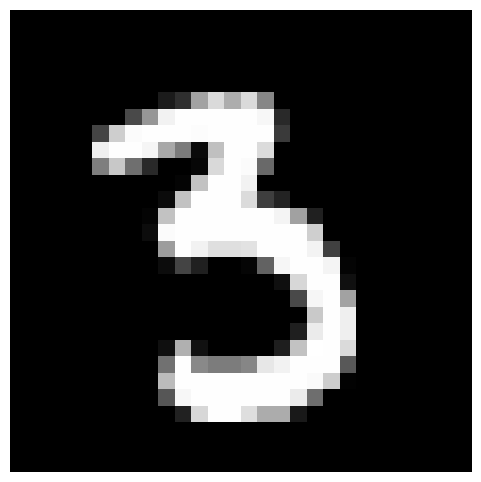

In [15]:
idx = np.random.randint(0, len(test_dataset))
x, y = test_dataset[idx]
gt = np.argmax(y)
pred = np.argmax(net.feedforward(x)) 

print(f'Ground truth: {gt}, Prediction: {pred}')
test_dataset.imshow(idx)